# Программирование на языке Python. Уровень 4. 
# Анализ и визуализация данных на языке Python. Библиотеки numpy, pandas, matplotlib"

# Модуль 8. Библиотека matplotlib: визуализация данных

1. Классификация информации цветом, формой линий и отметок
2. Аннотации для аналитических данных
3. Визуализация данных средствами пакета Seaborn
4. Многофакторный визуальный анализ
2. Работа с графическими изображениями
5. Графики в 3D, интерактивный режим

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (7.0, 7.0)

In [ ]:
!conda install -y seaborn

In [ ]:
!pip install seaborn

## Классификация информации цветом и формой

Обратите внимание на второй параметр функции ```plot()```

In [ ]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'r:', label='Default')
plt.plot(data, 'b-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

Первый вызов эквивалентен вызову функции с параметрами ```color='r', linestyle='dashed'```

In [ ]:
plt.plot(data, color='r', linestyle='dashed', label='Default')

Ознакомиться со всеми возможными стилями линий можно на сайте Matplotlib:
https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/linestyles.html

Можно добавить маркеры:

In [ ]:
plt.plot(data, color='r', linestyle='dotted', label='Default', marker='o')

На графики также можно наносить пояснительные надписи с указанием на те или иные точки:

In [ ]:
from datetime import datetime 

fig = plt.figure() 
ax = fig.add_subplot(1, 1, 1) 

data = pd.read_csv('data/spx.csv', index_col=0, parse_dates=True, skiprows=[0], names=['date', 'SPX']) 
spx = data['SPX'] 

spx.plot(ax=ax, style='k-') 

crisis_data = [ 
    (pd.to_datetime('2007-10-11'), 'Peak of bull market'), 
    (pd.to_datetime('2008-03-12'), 'Bear Stearns Fails'), 
    (pd.to_datetime('2008-09-15'), 'Банкротство Lehman') 
] 

for date, label in crisis_data: 
    ax.annotate(label, xy=(date, spx.asof(date) + 75), 
        xytext=(date, spx.asof(date) + 225), 
        arrowprops=dict(facecolor='black', headwidth=4, width=2, 
        headlength=4), 
        horizontalalignment='left', verticalalignment='top') 

# Zoom in on 2007-2010 
ax.set_xlim([pd.to_datetime('2007-01-01'), 
    pd.to_datetime('2011-01-01') ]) 
ax.set_ylim([600, 1800]) 

ax.set_title('Важнейшие даты кризиса 2008-2009 гг')

В задачах классификации иногда нужно представить пространственное распределение тех или иных признаков.

In [ ]:
rng = np.random.RandomState(0)
n = 30
for i, marker in enumerate(['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']):
    plt.plot(rng.randn(n) + 0.2*(i % 4), rng.randn(n) - 0.05*(i % 4), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

__ЗАДАНИЕ__ Для набора данных "Ирисы" выведите графики рассеяния для комбинаций различных признаков.

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = np.genfromtxt(url, delimiter=',', dtype='object')

iris_data = iris[:, :-1].astype(dtype=np.float64)
iris_name = iris[:,-1].astype(str)

# ваш код здесь


## Визуализация данных средствами пакета Seaborn

Пакет ```seaborn``` предоставляет больше возможностей для визуализации данных и отличается улучшенным оформлением. Функционал ```seaborn``` работает поверх библиотеки ```matplotlib```.

In [ ]:
import seaborn as sns


In [ ]:
iris_features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)', 'y']

df_iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
                      header=None,  
                     names=iris_features)
df_iris

In [ ]:
iris_data = df_iris.iloc[:,:-1]
iris_data

In [ ]:
pd.plotting.scatter_matrix(iris_data, 
                  figsize=(8, 8));

In [ ]:
plt.figure(figsize=(8,8))

sns.pairplot(iris_data,
             diag_kind='kde', plot_kws={'alpha': 0.2});

In [ ]:
plt.figure(figsize=(8,8))

_ = sns.heatmap(iris_data.corr(), annot=True, cmap="RdYlGn")
iris_data.corr()

In [ ]:
iris_data['sepal length (cm)'].hist()

In [ ]:
sns.histplot(iris_data['sepal length (cm)'], kde=True);

## Многофакторное сравнение

Рассмотрим на примере датасета tips.csv.

Средства для многофактороного сравнения по категориям встроены в Pandas. Посмотрим на примере распределения количества человек за одним столом в зависимости от дня недели:

In [ ]:
tips = pd.read_csv('data/tips.csv')
tips['tips_pct'] = tips['tip'] / tips['total_bill']
tips

In [ ]:
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts = party_counts.reindex(['Thur', 'Fri', 'Sat', 'Sun'])
party_counts = party_counts.loc[:, 2:5]  # уберем данные по столикам с 1 и 6 гостями, это редкие случаи
party_counts

Вызовем из свойства ```plot``` нашего dataframe'а функцию ```bar()```:

In [ ]:
party_counts.plot.bar();

Пакет seaborn - средство более высокого уровня и в некоторых случаях берет на себя всю необходимую предообработку данных. Например, давайте посмотрим на зависимость чаевых от дня недели:

In [ ]:
sns.barplot(x='tips_pct', y='day', data=tips, orient='h')

А теперь - процент чаевых не только ото дня, но и от времени суток, для этого введем еще один параметр ```hue``` (цвет).

In [ ]:
sns.barplot(x='tips_pct', y='day', hue='time', data=tips, orient='h')

Если нам нужно вывести дополнительные показатели, можем воспользоваться фасетной сеткой, которую также предоставляет нам seaborn. Отчет по тому же самому + признак "стол курящий/некурящий".

In [ ]:
sns.catplot(x='day', y='tips_pct', hue='time', col='smoker',
               kind='bar', data=tips)

In [ ]:
tips

Такую "сетку" можно распространить на все категороиальные признаки:

In [ ]:
sns.catplot(x='day', y='tips_pct', row='time',
               col='smoker',
               kind='bar', data=tips)

__ЗАДАНИЕ__ Выведите на экран зависимости процента чаевых от пола, времени и дня недели.

In [ ]:
# ваш код здесь


### Работа с графическими изображениями

Выведем фото девушки месяца за ноябрь 1972 года.

In [ ]:
import matplotlib.image as mpimg
lena = mpimg.imread('lena.jpg')


In [ ]:
plt.imshow(lena)

In [ ]:
lena.shape

In [ ]:
lena

Построим гистограмму распределения яркостей, для этого приведем "Лену" в одноканальный вариант:

In [ ]:
lena_gray = (np.sum(lena, axis=2) / 3)
plt.imshow(lena_gray, cmap='gray')

Теперь по всему множеству пикселей построим гистограмму их интенсивности:

In [ ]:
plt.hist(lena_gray.ravel(), bins=50)
plt.show()

__ЗАДАНИЕ__ На одной иллюстрации выведите изображение всех трех каналов R G B и постройте гистограммы для каждого канала. Подсказка: используйте ```plt.subplots(2,3)```

In [ ]:
# ваш код здесь


## 3D-графики, интерактивный режим

Изображения 3-мерного пространства строятся с использованием того же инструментария, только в функции ```axes()``` (или ```subplot()```)следует указать тип проекции ```projection='3d'```:


In [ ]:
ax = plt.axes(projection='3d');

Параметры отображаемой сцены можно варьировать: устанавливать высоту, азимут и угол обзора:

In [ ]:
ax = plt.axes(projection='3d')

ax.view_init(elev=45, azim=45, roll=0)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

В Jupyter Notebook реализована возможность использования интерактивного режима, в рамках которого можно вариьировать различные параметры отображения 3D-сцены (и не только!):

In [ ]:
from ipywidgets import interact

def plot_3D(elev=30, azim=30, roll=0):
    plt.figure(figsize=(10,7))
    ax = plt.subplot(projection='3d')
    ax.view_init(elev=elev, azim=azim, roll=roll)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

interact(plot_3D, elev=(-90, 90), azim=(-180, 180), roll=(-90, 90));

### Реализация функций z = f(x,y)

3-е измерение функции строится поверх конструкции ```meshgrid```, которая по сути является координатной сеткой для каждой точки функции.


In [ ]:
x = np.arange(1, 5).astype(dtype=np.float64)
y = np.arange(7, 4, -1).astype(dtype=np.float64)
XY = np.meshgrid(x, y)
XY

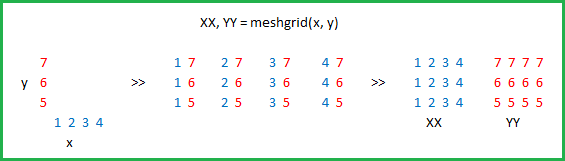

In [ ]:
x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)

Контуры поверхности строятся функциями ```ax.contour3D(X, Y, Z)```, ```plot_surface(X, Y, Z)```, ```plot_wireframe(X, Y, Z)``` и многими другими.

In [ ]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
# ax.plot_surface(X, Y, Z)
# ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

In [ ]:
def plot_3D_hat(elev=30, azim=30, roll=0):
    plt.figure(figsize=(10,7))
    ax = plt.subplot(projection='3d')
    ax.view_init(elev=elev, azim=azim, roll=roll)
    ax.plot_surface(X, Y, Z)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

interact(plot_3D_hat, elev=(-90, 90), azim=(-180, 180), roll=(-90, 90));

Также можно делать "температурные карты" - heatmaps, используя встроенные в ```matplotlib``` цветовые схемы. Проиллюстрируем это на примере с параболоидом:

In [ ]:
# создаем параболоид
m = 3
n = 2
b = 1
d = 0.75
def f(x, y):
    return (x + m) ** 2 + (y * d + n) ** 2 + b

x = np.linspace(-6-m, 6-m, 100)
y = np.linspace(-6-n, 6-n, 100)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

In [ ]:
cm = plt.cm.get_cmap('viridis')
plt.scatter(X, Y, c=Z, cmap=cm)
plt.colorbar()
plt.show()

Также эти данные можно визуализировать горизонталями:

In [ ]:
cp = plt.contour(X, Y, Z)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Можно комбинировать оба способа:

In [ ]:
cp = plt.contour(X, Y, Z, colors='black', linestyles='dashed', linewidths=1)
plt.clabel(cp, inline=1, fontsize=10)
cp = plt.contourf(X, Y, Z, cmap='Reds')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

__ЗАДАНИЕ__ 

На примере данных, сгенерированных функцией $z = sin(\sqrt{(x - m)^2 + (y - n)^2}) + b$ ("шляпа") сделайте срезы по случайным значениям x, y, z, отобразите их в виде графиков. 


In [ ]:
m = 3
n = 2
b = 1
def f(x, y):
    # ваш код здесь
    pass


x = np.linspace(0, -2*m, 100)
y = np.linspace(0, -2*n, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
x

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')

In [ ]:
# ваш код здесь

